In [1]:
import torch
import numpy as np
from skimage import data
import matplotlib.pyplot as plt
import cv2 as cv

In [2]:
im = cv.imread('A.jpeg')

Text(0.5, 1.0, 'Original image')

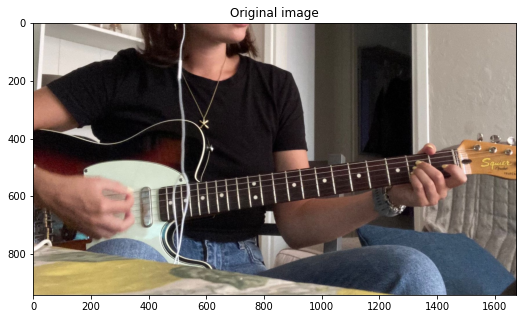

In [3]:
f, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.imshow(cv.cvtColor(im, cv.COLOR_BGR2RGB))
ax.set_title('Original image')

Text(0.5, 1.0, 'Original image')

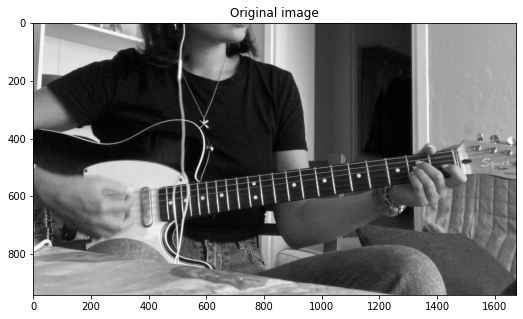

In [4]:
im_gray = cv.cvtColor(im, cv.COLOR_BGR2GRAY)
f, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.imshow(im_gray, cmap='gray')
ax.set_title('Original image')

In [5]:
def get_gradient(im, kernel_x, kernel_y):
  # Applichiamo i kernel
  G_x = cv.filter2D(im, -1, kernel_x)
  G_y = cv.filter2D(im, -1, kernel_y)

  # Calcoliamo magnitude e direzione del gradiente
  M = np.sqrt(G_x**2 + G_y**2)
  dir = np.arctan2(G_y, G_x)

  return M, dir

In [6]:
def get_grayscale_image_from_gradient(im, M, max_magnitude_value, use_maximum_array_value=False, color_image=True):
  # Si potrebbe dividere per il massimo valore che la magnitude può assumere.
  # Ma dividendo per il valore massimo nell'array, i contorni nell'immagine finale sono più evidenti
  if use_maximum_array_value:
    if color_image:
      for i in range(3):
        M[:,:,i] = M[:,:,i] / np.max(M[:,:,i]) * 255
    else:
      M = M / np.max(M) * 255
  else:
    M = M / max_magnitude_value * 255
  
  M = np.clip(np.around(M), 0, 255).astype(np.uint8)

  return M

In [7]:
# Definiamo i kernel
sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], dtype=np.float32)
sobel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]], dtype=np.float32)

In [8]:
sobel_max_magnitude_value = 1443

Text(0.5, 1.0, 'After Sobel')

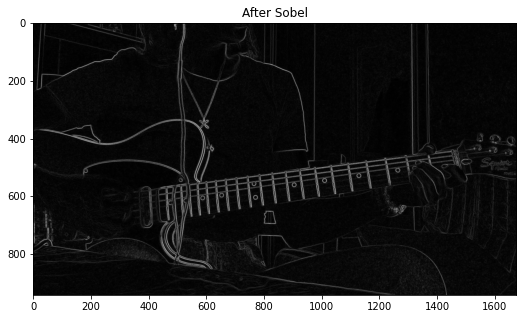

In [9]:
M, dir = get_gradient(im_gray.astype(np.float32), sobel_x, sobel_y)
grayscale_image = get_grayscale_image_from_gradient(im_gray.astype(np.float32), M, sobel_max_magnitude_value, True, False)

f, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.imshow(grayscale_image, cmap='gray')
ax.set_title('After Sobel')

Text(0.5, 1.0, 'After Sobel')

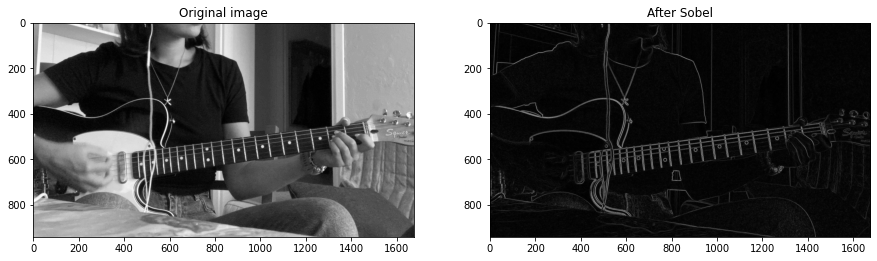

In [10]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.imshow(im_gray, cmap='gray')
ax1.set_title('Original image')
ax2.imshow(grayscale_image, cmap='gray')
ax2.set_title('After Sobel')

# Frei and Chen

In [11]:
# Definiamo i kernel
frei_and_chen_x = np.array([[-1, 0, 1], [-np.sqrt(2), 0, np.sqrt(2)], [-1, 0, 1]], dtype=np.float32)
frei_and_chen_y = np.array([[-1, -np.sqrt(2), -1], [0, 0, 0], [1, np.sqrt(2), 1]], dtype=np.float32)

In [12]:
frei_and_chen_max_magnitude_value = 1232

Text(0.5, 1.0, 'After Frei and Chen')

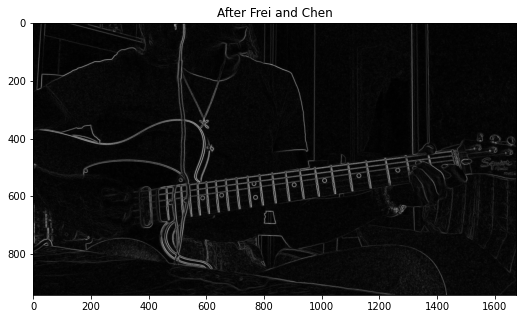

In [13]:
M, dir = get_gradient(im_gray.astype(np.float32), frei_and_chen_x, frei_and_chen_y)
grayscale_image = get_grayscale_image_from_gradient(im_gray.astype(np.float32), M, frei_and_chen_max_magnitude_value, True, False)

f, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.imshow(grayscale_image, cmap='gray')
ax.set_title('After Frei and Chen')

Text(0.5, 1.0, 'After Frei and Chen')

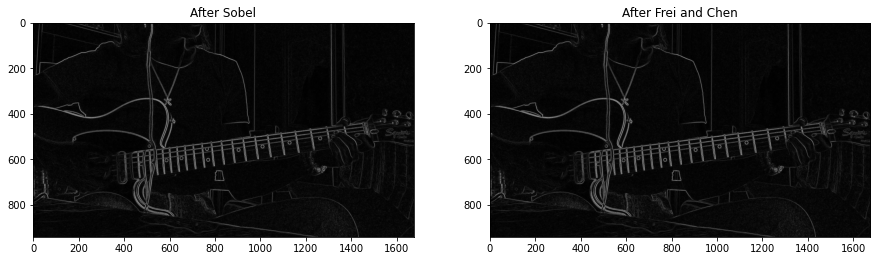

In [14]:
M, dir = get_gradient(im_gray.astype(np.float32), sobel_x, sobel_y)
sobel_im = get_grayscale_image_from_gradient(im_gray.astype(np.float32), M, sobel_max_magnitude_value, True, False)

M, dir = get_gradient(im_gray.astype(np.float32), frei_and_chen_x, frei_and_chen_y)
frei_and_chen_im = get_grayscale_image_from_gradient(im_gray.astype(np.float32), M, frei_and_chen_max_magnitude_value, True, False)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.imshow(sobel_im, cmap='gray')
ax1.set_title('After Sobel')
ax2.imshow(frei_and_chen_im, cmap='gray')
ax2.set_title('After Frei and Chen')

# Con sharpening

In [15]:
def sharpening(im):
  im = im.astype(np.float32)
  kernel = np.array([[-1, -1, -1],
                     [-1,  9, -1],
                     [-1, -1, -1]])
  out = cv.filter2D(im, -1, kernel)
  out = np.around(out)
  out = np.clip(out, 0, 255)
  out = out.astype(np.uint8)
  return out

In [16]:
sharpened_im = sharpening(im)

Text(0.5, 1.0, 'Sharpened image')

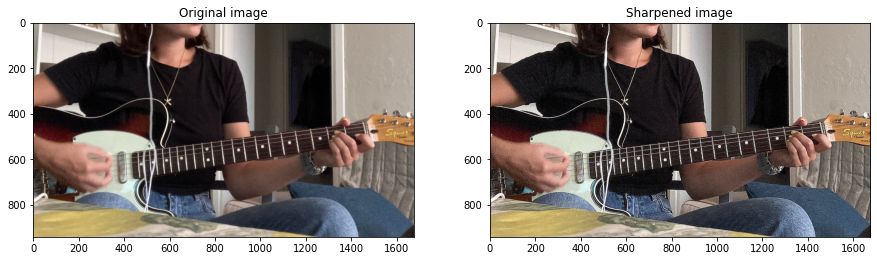

In [17]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.imshow(cv.cvtColor(im, cv.COLOR_BGR2RGB))
ax1.set_title('Original image')
ax2.imshow(cv.cvtColor(sharpened_im, cv.COLOR_BGR2RGB))
ax2.set_title('Sharpened image')

Text(0.5, 1.0, 'Sharpened image')

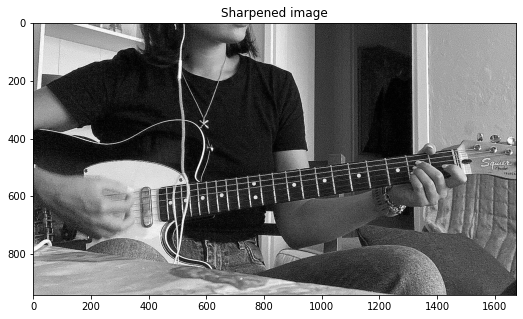

In [18]:
im_gray = cv.cvtColor(sharpened_im, cv.COLOR_BGR2GRAY)
f, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.imshow(im_gray, cmap='gray')
ax.set_title('Sharpened image')

Text(0.5, 1.0, 'After Frei and Chen')

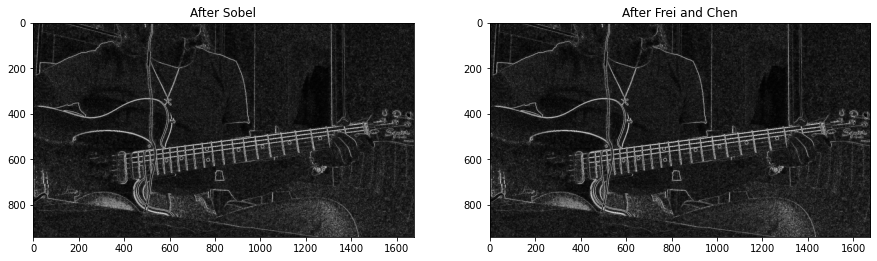

In [19]:
M, dir = get_gradient(im_gray.astype(np.float32), sobel_x, sobel_y)
sobel_im = get_grayscale_image_from_gradient(im_gray.astype(np.float32), M, sobel_max_magnitude_value, True, False)

M, dir = get_gradient(im_gray.astype(np.float32), frei_and_chen_x, frei_and_chen_y)
frei_and_chen_im = get_grayscale_image_from_gradient(im_gray.astype(np.float32), M, frei_and_chen_max_magnitude_value, True, False)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.imshow(sobel_im, cmap='gray')
ax1.set_title('After Sobel')
ax2.imshow(frei_and_chen_im, cmap='gray')
ax2.set_title('After Frei and Chen')